In [ ]:
---
embed-resources: true
self-contained: true
format:
    html    
---

In [1]:
!pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post11-py3-none-any.whl size=2959 sha256=35a70f856c5264c3495cc6023f7d20bd551dde176475b9f9144ad38c70c8059b
  Stored in directory: /root/.cache/pip/wheels/aa/9c/60/f67813603a52fc35057868f1aba0003cc75b72583dcaa2c341
Successfully built sklearn


In [2]:
import pandas as pd

In [3]:
!pip install palmerpenguins

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [4]:
from palmerpenguins import load_penguins

penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


We would need to **dummify** sex, species, and island.

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [5]:
import sklearn
import pandas as pd
import numpy as np

In [6]:
# Dummifying Sex, Species, Island

# Using get_dummies

penguins_quant = pd.get_dummies(penguins)
penguins_quant

# Using OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
penguins_dummies = enc.fit_transform(penguins)
penguins_dummies

<344x409 sparse matrix of type '<class 'numpy.float64'>'
	with 2752 stored elements in Compressed Sparse Row format>

In [16]:
# Dropping NA's
penguins = penguins.dropna()

# Specifying Training/Test Sets
from sklearn.model_selection import train_test_split

X = penguins[["bill_length_mm"]] # need 2D array for sklearn
y = penguins["bill_depth_mm"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

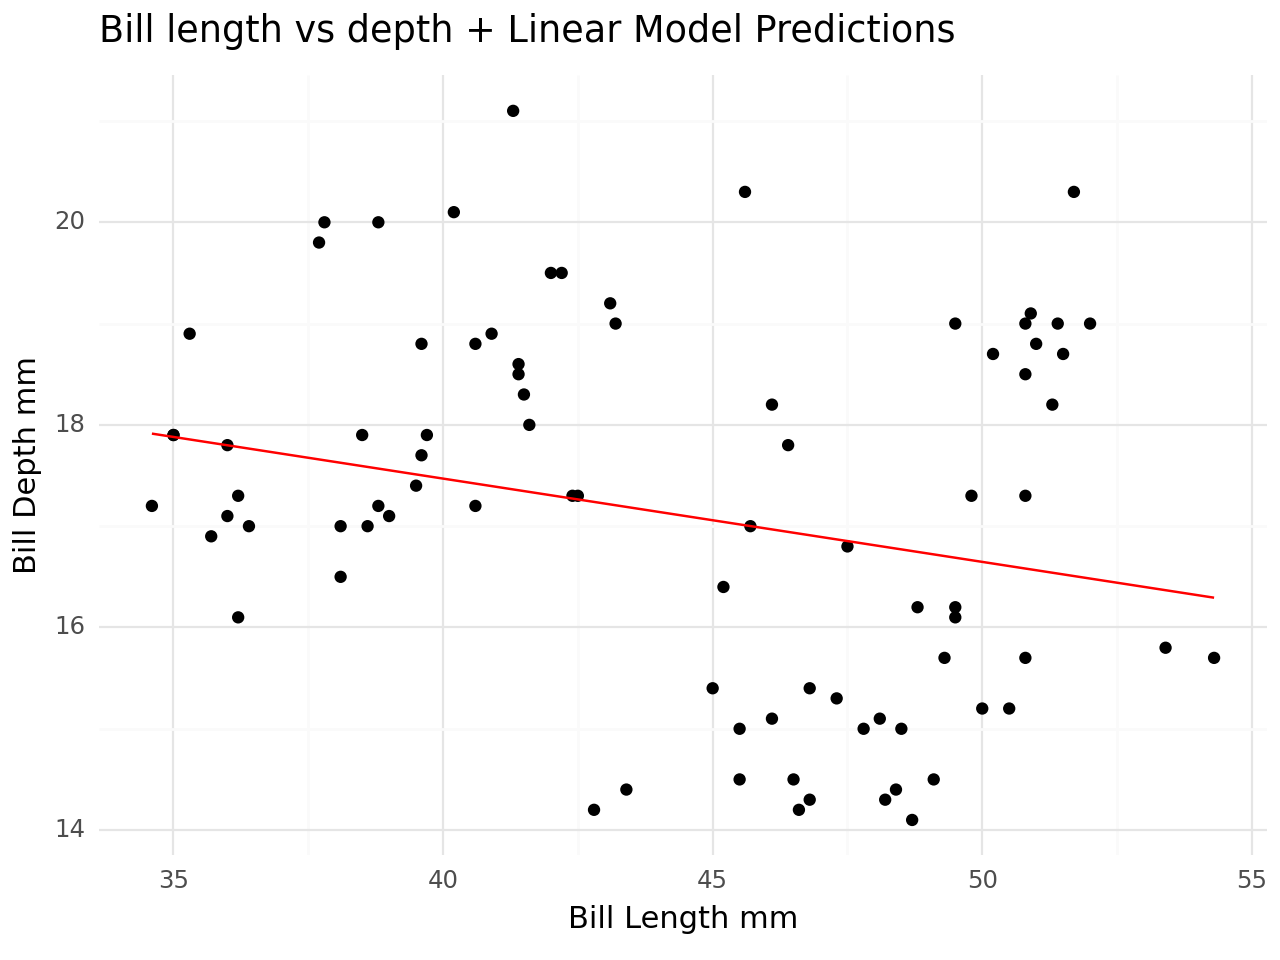

<Figure Size: (640 x 480)>

In [17]:
# Simple Linear Regression

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from plotnine import *
from sklearn.pipeline import Pipeline

# Specifying Model and Fits
lr_model = LinearRegression()
lr_model.fit(X=X_train, y=y_train)
lr_pred = lr_model.predict(X=X_test)

# Creating a DataFrame for plotting
test_data = pd.DataFrame({'X_test': X_test['bill_length_mm'], 'y_test': y_test, 'lr_pred': lr_pred})

# Plotting
(ggplot(test_data, aes(x="X_test"))
+ geom_point(test_data, aes(y='y_test'), color="black")
+ geom_line(test_data, aes(y='lr_pred'), color="red")
+ theme_minimal()
+ labs(x='Bill Length mm', y='Bill Depth mm', title='Bill length vs depth + Linear Model Predictions')
)

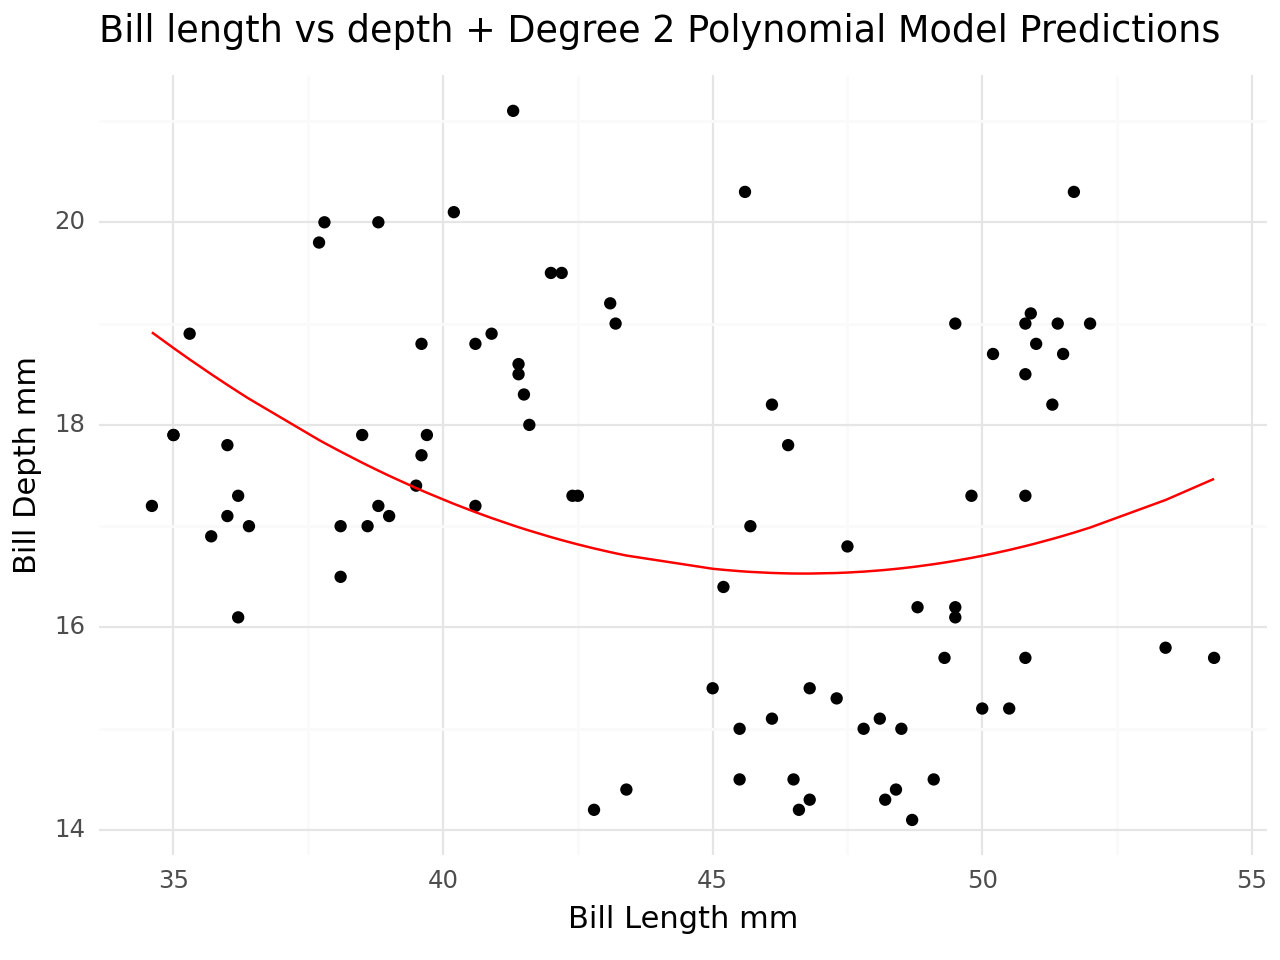

<Figure Size: (640 x 480)>

In [23]:
# Quadratic (Degree 2 Poly.) Model

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Renaming processess
quad_reg = PolynomialFeatures(degree=2)
lr = LinearRegression()

# Pipeline for data preprocessing and modeling
pipeline = Pipeline([
    ('polynomial_features', quad_reg),
    ('linear_regression', lr)
])

# Fitting the model on the training dataset
pipeline.fit(X_train, y_train)

# Predicting with model
quad_pred = pipeline.predict(X_test)

# Creating a DataFrame for plotting
test_data = pd.DataFrame({'X_test': X_test['bill_length_mm'], 'y_test': y_test, 'quad_pred': quad_pred})

# Plotting
(ggplot(test_data, aes(x="X_test"))
+ geom_point(test_data, aes(y='y_test'), color="black")
+ geom_line(test_data, aes(y='quad_pred'), color="red")
+ theme_minimal()
+ labs(x='Bill Length mm', y='Bill Depth mm', title='Bill length vs depth + Quadratic Model Predictions')
)

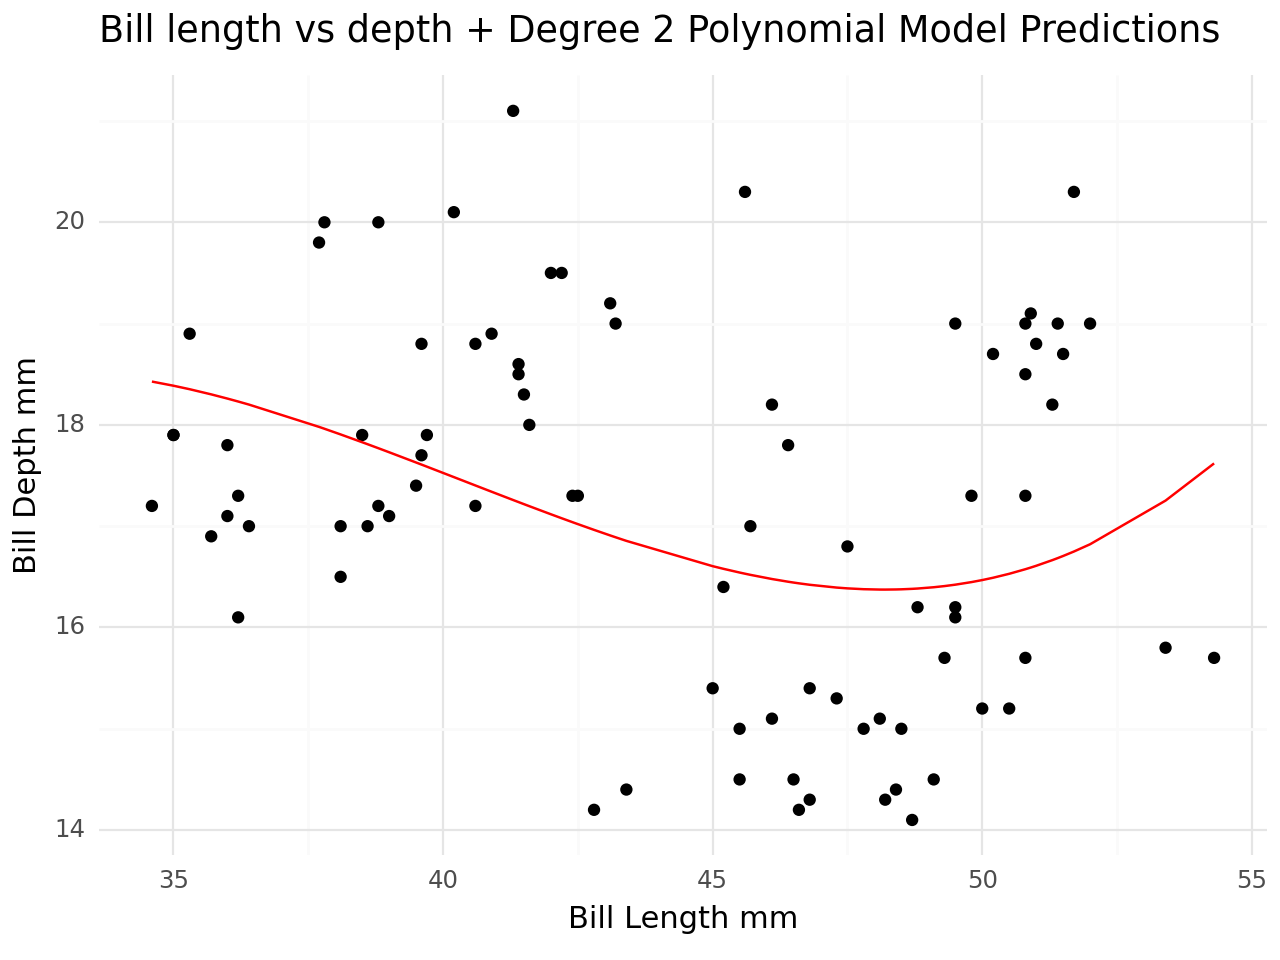

<Figure Size: (640 x 480)>

In [24]:
# Cubic (Degree 3 Poly.) Model

# Renaming processess
cub_reg = PolynomialFeatures(degree=3)
lr = LinearRegression()

# Pipeline for data preprocessing and modeling
pipeline = Pipeline([
    ('polynomial_features', cub_reg),
    ('linear_regression', lr)
])

# Fitting the model on the training dataset
pipeline.fit(X_train, y_train)

# Predicting with model
cub_pred = pipeline.predict(X_test)

# Creating a DataFrame for plotting
test_data = pd.DataFrame({'X_test': X_test['bill_length_mm'], 'y_test': y_test, 'quad_pred': cub_pred})

# Plotting
(ggplot(test_data, aes(x="X_test"))
+ geom_point(test_data, aes(y='y_test'), color="black")
+ geom_line(test_data, aes(y='quad_pred'), color="red")
+ theme_minimal()
+ labs(x='Bill Length mm', y='Bill Depth mm', title='Bill length vs depth + Cubic Model Predictions')
)

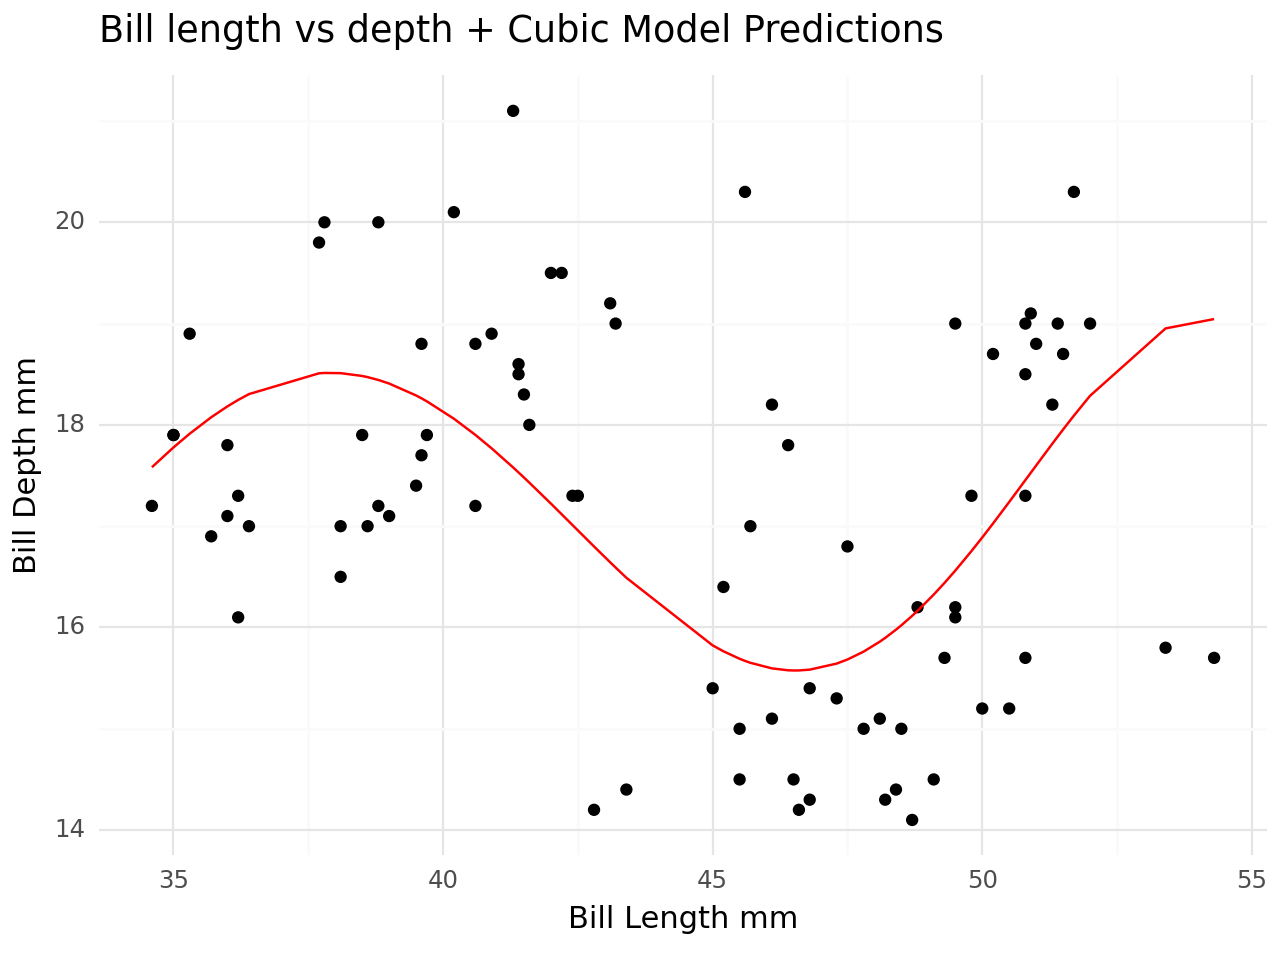

<Figure Size: (640 x 480)>

In [25]:
# Degree 10 Polynomial Model


# Renaming processess
dec_reg = PolynomialFeatures(degree=10)
lr = LinearRegression()

# Pipeline for data preprocessing and modeling
pipeline = Pipeline([
    ('polynomial_features', dec_reg),
    ('linear_regression', lr)
])

# Fitting the model on the training dataset
pipeline.fit(X_train, y_train)

# Predicting with model
dec_pred = pipeline.predict(X_test)

# Creating a DataFrame for plotting
test_data = pd.DataFrame({'X_test': X_test['bill_length_mm'], 'y_test': y_test, 'quad_pred': dec_pred})

# Plotting
(ggplot(test_data, aes(x="X_test"))
+ geom_point(test_data, aes(y='y_test'), color="black")
+ geom_line(test_data, aes(y='quad_pred'), color="red")
+ theme_minimal()
+ labs(x='Bill Length mm', y='Bill Depth mm', title='Bill length vs depth + Cubic Model Predictions')
)

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of the models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

Linear, quadratic, and cubic models underfit data, and I can tell because there are a lot of observations that are far away from the predicted line.

Perhaps the degree 10 model overfits the data because it follows the data points somewhat closely.

With all that said though, I still think the degree 10 model fits the data best because it follows the general pattern of the data but still allowing for a little bit of error.